In [1]:
# -*- coding: utf-8 -*-

import pandas as pd

# read_csv 함수로 데이터를 Dataframe 형태로 불러옵니다.
file_path = 'chipotle.tsv'
chipo = pd.read_csv(file_path, sep = '\t')
chipo

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98
...,...,...,...,...,...
4617,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Sour ...",$11.75
4618,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Sour Cream, Cheese...",$11.75
4619,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Pinto...",$11.25
4620,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Lettu...",$8.75


#### order_id : 주문번호 
#### quantity : 아이템의 주문 수량
#### item_name : 주문한 아이템의 이름
#### choice_description : 주문한 아이템의 상세 선택옵션
#### item_price : 주문 아이템의 가격정보

In [2]:
ㄴ

(4622, 5)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4622 entries, 0 to 4621
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   order_id            4622 non-null   int64 
 1   quantity            4622 non-null   int64 
 2   item_name           4622 non-null   object
 3   choice_description  3376 non-null   object
 4   item_price          4622 non-null   object
dtypes: int64(2), object(3)
memory usage: 180.7+ KB
None


In [3]:
# order_id를 string으로 바꾸기. id가 계산되면 안됨.

chipo['order_id'] = chipo['order_id'].astype(str)

In [4]:
chipo.describe()

# 결론적으로 quantity를 보여준것

,quantity
count,4622.000000
mean,1.075725
std,0.410186
min,1.000000
25%,1.000000
50%,1.000000
75%,1.000000
max,15.000000


In [5]:
print(len(chipo['order_id'].unique()))
print(len(chipo['item_name'].unique()))

1834
50


가장 많이 주문한 item

In [7]:
chipo['item_name'].value_counts().index[0]

'Chicken Bowl'

In [10]:
item_count = chipo['item_name'].value_counts()[:10]
for idx, (val,cnt) in enumerate(item_count.items(),1):
    print("Top", idx,':',val,cnt)

Top 1 : Chicken Bowl 726
Top 2 : Chicken Burrito 553
Top 3 : Chips and Guacamole 479
Top 4 : Steak Burrito 368
Top 5 : Canned Soft Drink 301
Top 6 : Steak Bowl 211
Top 7 : Chips 211
Top 8 : Bottled Water 162
Top 9 : Chicken Soft Tacos 115
Top 10 : Chips and Fresh Tomato Salsa 110


음식 10달러 이상 가격의 메뉴가 얼마나 팔렸는지 문제 낼수있다.ㅇ

-- 24.06.03 --

3.0.2 item당 주문 개수와 총량 구하기

In [12]:
chipo.pivot_table(index='item_name',values='order_id', aggfunc='count')

,order_id
item_name,
6 Pack Soft Drink,54
Barbacoa Bowl,66
Barbacoa Burrito,91
Barbacoa Crispy Tacos,11
Barbacoa Salad Bowl,10
Barbacoa Soft Tacos,25
Bottled Water,162
Bowl,2
Burrito,6


In [18]:
# groupby로 하는법

order_count = chipo.groupby('item_name')[['order_id']].count()
order_count[:10]

,order_id
item_name,
6 Pack Soft Drink,54
Barbacoa Bowl,66
Barbacoa Burrito,91
Barbacoa Crispy Tacos,11
Barbacoa Salad Bowl,10
Barbacoa Soft Tacos,25
Bottled Water,162
Bowl,2
Burrito,6


In [34]:
# item 주문 총량

item_quantity = chipo.groupby('item_name')['quantity'].sum()
item_quantity[:10]

item_name
6 Pack Soft Drink         55
Barbacoa Bowl             66
Barbacoa Burrito          91
Barbacoa Crispy Tacos     12
Barbacoa Salad Bowl       10
Barbacoa Soft Tacos       25
Bottled Water            211
Bowl                       4
Burrito                    6
Canned Soda              126
Name: quantity, dtype: int64

In [20]:
# pivot_table로 바꿔보롸

chipo.pivot_table(index='item_name',values='quantity', aggfunc='sum')

,quantity
item_name,
6 Pack Soft Drink,55
Barbacoa Bowl,66
Barbacoa Burrito,91
Barbacoa Crispy Tacos,12
Barbacoa Salad Bowl,10
Barbacoa Soft Tacos,25
Bottled Water,211
Bowl,4
Burrito,6


3.0.3 [시각화로 분석 결과 살펴보기]

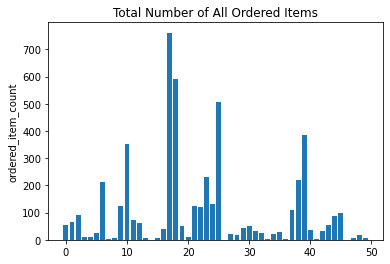

In [36]:
import numpy as np
import matplotlib.pyplot as plt

item_name_list = item_quantity.index.tolist() # 리스트로 만들기
x_pos = np.arange(len(item_name_list))
order_cnt = item_quantity.values.tolist()

plt.bar(x_pos, order_cnt, align='center')
plt.ylabel('ordered_item_count')
plt.title('Total Number of All Ordered Items')
plt.show()

<데이터 전처리> : 함수를 이용

#### 4.0.1 [[apply와 lambda 함수를 이용한 데이터 전처리]]

### item price를 숫자로 변경~

In [45]:
chipo['item_price'] = chipo['item_price'].apply(lambda x:float(x[1:]))
chipo['item_price']

0        2.39
1        3.39
2        3.39
3        2.39
4       16.98
        ...  
4617    11.75
4618    11.75
4619    11.25
4620     8.75
4621     8.75
Name: item_price, Length: 4622, dtype: float64

In [46]:
chipo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4622 entries, 0 to 4621
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   order_id            4622 non-null   object 
 1   quantity            4622 non-null   int64  
 2   item_name           4622 non-null   object 
 3   choice_description  3376 non-null   object 
 4   item_price          4622 non-null   float64
dtypes: float64(1), int64(1), object(3)
memory usage: 180.7+ KB


In [48]:
chipo.head()
# 옵션때매 chicken bowl 은 가격이 좀 다름

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,2.39
1,1,1,Izze,[Clementine],3.39
2,1,1,Nantucket Nectar,[Apple],3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",16.98


### [주문당 평균 계산금액 출력하기]

In [50]:
chipo.groupby('order_id')['item_price'].sum()

order_id
1       11.56
10      13.20
100     10.08
1000    20.50
1001    10.08
        ...  
995     24.95
996     43.00
997     22.50
998     10.88
999     29.25
Name: item_price, Length: 1834, dtype: float64

In [51]:
# 주문당 평균 금액

chipo.groupby('order_id')['item_price'].sum().mean()

18.811428571428717

### [한 주문에 10달러 이상 사용한 주문 번호(id) 출력하기]

In [64]:
chipo_orderid_group =chipo.groupby('order_id').sum()
result = chipo_orderid_group[chipo_orderid_group.item_price>10]
result

,quantity,item_price
order_id,,
1,4,11.56
10,2,13.20
100,2,10.08
1000,2,20.50
1001,2,10.08
...,...,...
995,3,24.95
996,4,43.00
997,2,22.50


In [75]:
# 각 아이템의 가격 구하기

# 정답이 없다.. 알수없어서. 각 아이템 중에서 가장 싼걸 하면 되지 않을까요

chipo_one_item = chipo[chipo.quantity == 1]
# 아이템별 가격
price_per_item = chipo_one_item.groupby('item_name').min()
# 아이템별 가격이 비싼 순으로 출력
price_per_item.sort_values(by='item_price',ascending=False)[:15]

,order_id,quantity,choice_description,item_price
item_name,,,,
Steak Salad Bowl,1032,1,"[Fresh Tomato Salsa, Lettuce]",9.39
Barbacoa Salad Bowl,1283,1,"[Fresh Tomato Salsa, Guacamole]",9.39
Carnitas Salad Bowl,1035,1,"[Fresh Tomato Salsa, [Rice, Black Beans, Chees...",9.39
Carnitas Soft Tacos,1011,1,"[Fresh Tomato Salsa (Mild), [Black Beans, Rice...",8.99
Carnitas Crispy Tacos,1774,1,"[Fresh Tomato Salsa, [Fajita Vegetables, Rice,...",8.99
Steak Soft Tacos,1054,1,"[Fresh Tomato Salsa (Mild), [Cheese, Sour Cream]]",8.99
Carnitas Salad,1500,1,"[[Fresh Tomato Salsa (Mild), Roasted Chili Cor...",8.99
Carnitas Bowl,1007,1,"[Fresh Tomato (Mild), [Guacamole, Lettuce, Ric...",8.99
Barbacoa Soft Tacos,1103,1,"[Fresh Tomato Salsa, [Black Beans, Cheese, Let...",8.99


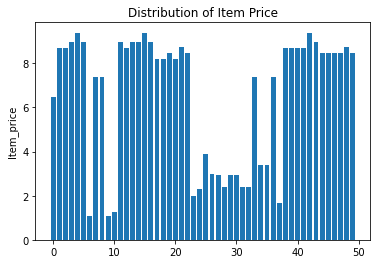

In [79]:
# 그림 그리기

item_name_list = price_per_item.index.tolist() 
x_pos = np.arange(len(item_name_list))
item_price = price_per_item['item_price'].tolist()

plt.bar(x_pos, item_price, align='center')
plt.ylabel('Item_price')
plt.title('Distribution of Item Price')
plt.show()

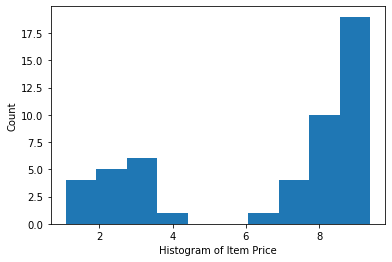

In [83]:
# 가격분포 히스토그램

plt.hist(item_price)
plt.ylabel('Count')
plt.xlabel('Histogram of Item Price')
plt.show()

# 8불이 제일 많다.